1. Объясните, как вычисляется качество модели с задачей
классификации:
назовите основные и вторичные метрики, приведите пример.
2. Что такое тестовый набор данных (test set) и для чего
он нужен?
3. В чем разница между параметром модели и
гиперпараметром алгоритма
обучения? Приведите примеры.

**Задание 1**

Качество модели классификации оценивается с помощью различных метрик, которые позволяют понять, насколько хорошо модель справляется с задачей предсказания класса для новых данных.

Основные метрики:

1.   Точность (Accuracy): Доля правильных предсказаний от общего количества предсказаний.
2. Точность (Precision): Доля правильных положительных предсказаний среди всех предсказаний как положительных.
3. Полнота (Recall): Доля правильных положительных предсказаний среди всех фактических положительных примеров.
4. F1-мера: Гармоническое среднее точности и полноты.

Вторичные метрики:

1. ROC-кривая (Receiver Operating Characteristic): График, показывающий соотношение между истинно-положительными и ложно-положительными предсказаниями при изменении порога классификации.
2. AUC (Area Under the Curve): Площадь под кривой ROC. Чем больше AUC, тем лучше модель.
3. Матрица ошибок (Confusion Matrix): Таблица, показывающая количество правильных и неправильных предсказаний для каждого класса.
4. Средневзвешенная точность (Weighted Average Precision): Средняя точность модели по всем классам, с учетом количества примеров в каждом классе.

Выбор метрики для оценки качества модели зависит от конкретной задачи классификации. Например, в задачах медицинской диагностики, где важно найти все положительные случаи (например, раковые заболевания), полнота будет более важной метрикой, чем точность.

In [ ]:
!pip install pandas scikit-learn seaborn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [ ]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Предобработка данных, удаляем ненужные столбцы, обрабатываем пропуски.

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)  # Заполнение пропусков в возрасте медианой
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Заполнение пропусков в порту отправления модой

<ipython-input-13-7cf354066f6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Заполнение пропусков в возрасте медианой
<ipython-input-13-7cf354066f6c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

**Задание 2**

Тестовый набор данных - это часть данных, которая не использовалась при обучении модели. Он нужен для оценки качества обученной модели на неизвестных данных.

Цель тестового набора:

1. Измерить обобщающую способность модели:  Модель должна не просто запоминать данные из обучающего набора, но и уметь предсказывать на новых данных
2. Тестовый набор позволяет оценить, насколько хорошо модель справляется с этой задачей.
3. Проверить модель на переобучение:  Если модель слишком хорошо работает на обучающем наборе, но плохо на тестовом, это говорит о переобучении.  Модель запомнила шум и особенности обучающего набора, но не усвоила общие закономерности.
4. Сравнение моделей:  Тестовый набор позволяет сравнить разные модели и выбрать лучшую.

Разделяем данные на признаки и целевую переменную, также на обучающую и тестовую выборки

In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Задание 3**

Параметры модели - это значения, которые модель  обучает на основе данных. Они определяют внутреннее состояние модели и используются для  предсказания на новых данных.

Гиперпараметры алгоритма обучения - это значения, которые задаются вручную перед обучением модели. Они контролируют процесс обучения и влияют на то, как модель учится.

Пример:

Линейная регрессия:

1. Параметры модели:  Коэффициенты (weights) и свободный член (bias) уравнения регрессии. Модель учится на данных, чтобы найти наилучшие значения этих параметров, которые минимизируют ошибку предсказания.
2. Гиперпараметры:  Скорость обучения (learning rate), которая определяет, насколько быстро модель изменяет параметры при обучении. Другим гиперпараметром может быть количество итераций (epochs), то есть сколько раз модель проходит по всем данным.

Пример:

Нейронная сеть:

1. Параметры модели:  Веса (weights) и смещения (biases) в нейронной сети. Модель обучается на данных, чтобы найти наилучшие значения этих параметров, которые минимизируют ошибку предсказания.
2. Гиперпараметры: Архитектура сети (количество слоев, количество нейронов в каждом слое), функция активации, функция потерь, оптимизатор (например, SGD, Adam). Эти параметры задаются заранее и влияют на процесс обучения.



In [ ]:
# Создание и обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



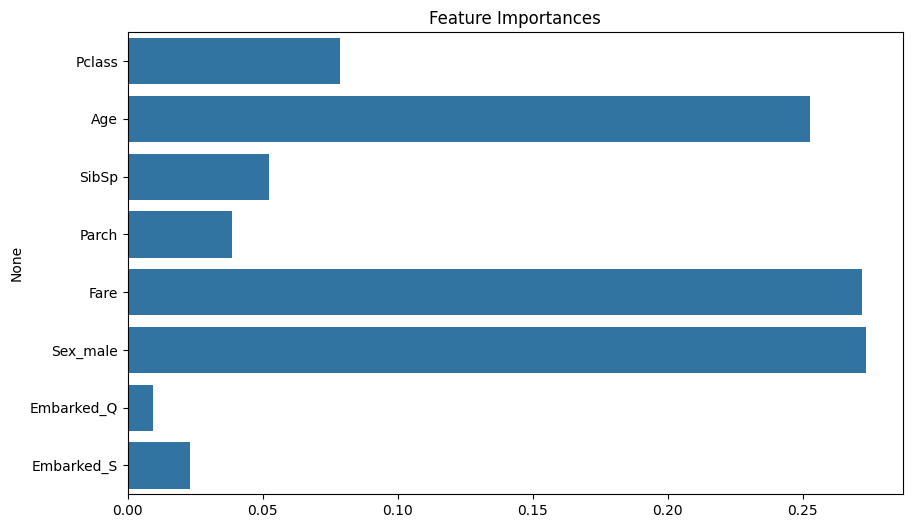

In [ ]:
# Визуализация важности признаков
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()